### 3.1 Sufficient Statistics: examples & illustration of the Factorization theorem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [4]:
#A helper class for printing colored text to the terminal
class bcolors:
    """Print colored text to the terminal"""
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
def success(text):
    print(bcolors.OKGREEN + text + bcolors.ENDC)
    
def fail(text):
    print(bcolors.FAIL + text + bcolors.ENDC)

#### 1. Data Source:
- The data source for the Task 3.1 is a generated, random exponentially distributed sample of size n
- $X \equiv Exp(\lambda), \lambda = 0.7$

##### 2. Research purpose:

1. Find a sufficient statistics $T$ for the parameter $\lambda$
2. Prove that $T$ is a sufficient statistics
3. Illustrate the Factorization theorem

##### 3. Model definition:
Model: $(X,\{P_{\lambda}, \lambda \in \Lambda\})$:
   - X = $[ 0, +\infty)$
   - $\lambda = 0.7$; $\Lambda = \{x \in \mathbb{R} | x>0\}$
   - $P_{\lambda} \equiv \textit{Exp}\space(\lambda)$

In [5]:
Lambda=0.7

In [6]:
def X(n):
    global Lambda
    return expon.rvs(0,1/Lambda,n)

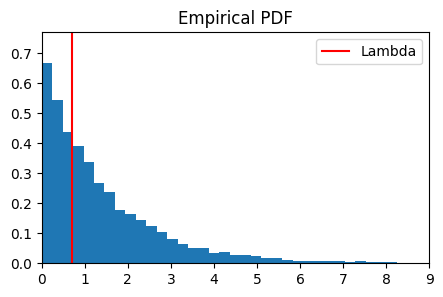

In [7]:
n=10000
plt.gcf().set_size_inches((5,3))
plt.hist(X(n),density=True,bins=60)
plt.xlim([0,9])
plt.ylim([0,Lambda*1.1])
plt.title("Empirical PDF")
plt.axvline(Lambda,color="r",label="Lambda")
plt.legend()
plt.show()

$E(Exp(\lambda)) = \frac{1}{\lambda}$

$\text{Let X - exponentially distributed sample. }(|X| = n). \text{Then we have:}$

$EX = \frac{1}{\lambda} = \frac{1}{n}\sum\limits_{i=1}^{n}{x_i}\newline
\space\small{\text{(note: sample mean is an efficient, consistent, asymptotically normal estimator)}}$

$\newline\newline\text{Next we define a statistics for the estimation of parameter }\lambda\text{ as follows: }\newline
T(X) = n(\sum\limits_{i=1}^{n}{x_i})^{-1} = \frac{1}{E(X)}
$

$\text{T(X) - is an efficient, consistent, asymptotically normal estimator, and does not depend on the value of parameter }\lambda$

In [8]:
def T(X):
    return 1/X.mean()

In [15]:
print("Lambda =",Lambda)
for i in range(2,7):
    n=pow(10,i)
    t=T(X(n))
    print("[n = %d]: T(X) ~= %.3f"%(n,t))

Lambda = 0.7
[n = 100]: T(X) ~= 0.765
[n = 1000]: T(X) ~= 0.665
[n = 10000]: T(X) ~= 0.698
[n = 100000]: T(X) ~= 0.703
[n = 1000000]: T(X) ~= 0.700


$\text{Factorization theorem:}\newline
\text{Let }X \equiv U(\theta), \theta \in \Theta \newline
\text{Let } f_{\theta} - \text{a Probability Density Function of the random variable X} \newline
T(X) - \text{is a sufficient statistics for the parameter } \theta \text{ if:}\newline
\text{1. Exists } g_{\theta}(t) \equiv g_{\theta}(T(x)) - \text{a function that depends on }\theta\text{ only over the value of } T(X)\newline
\text{2. Exists } h(X) - \text{a function that does not depend on }\theta : \newline
$
$$f_{\theta} = g_{\theta}(T(x))h(X)$$

 $f_{\lambda}(x) = \lambda e^{-\lambda x} - \text{Exponential distribution PDF}$
 
 $=> g_{\lambda}(t) = t\newline h(x_1 ... x_n,x)=e^{-xn(\sum\limits_{i=1}^{n}{x_i})^{-1}}, \newline t = T(X)$
 
 $h(X) - \text{depends on the value of parameter }\lambda\text{ only over the sample X: } n(\sum\limits_{i=1}^{n}{x_i})^{-1}$

In [16]:
from math import exp,sqrt
from random import randint
def g(t):
    return t
def h(X,x):
    return exp(-x/X.mean())
def f(x):
    global Lambda
    return Lambda*exp(-Lambda*x)

In [17]:
#Error plot for an estimator T(X) of parameter theta (mean squared error)
def error(theta,T, X):
    print("Theta =",theta)
    print("Theta estimator:",T)
    mse = 0
    error_arr=[]
    sample_sizes=range(1000,101000,1000)
    for sample_size in sample_sizes:
        theta_appr = T(X(sample_size))
        sqe=(theta-theta_appr)**2
        mse+=sqe
        error_arr.append(sqe)
    mse/=len(sample_sizes)
    print("MSE:",mse)
    plt.plot(sample_sizes,error_arr, color="b", label="squared error")
    plt.axhline(mse,color="r", label="mean squared error")
    plt.legend()
    return mse

Theta = 0.7
Theta estimator: <function T at 0x0000016C7EAF9B40>
MSE: 2.328837714477333e-05


2.328837714477333e-05

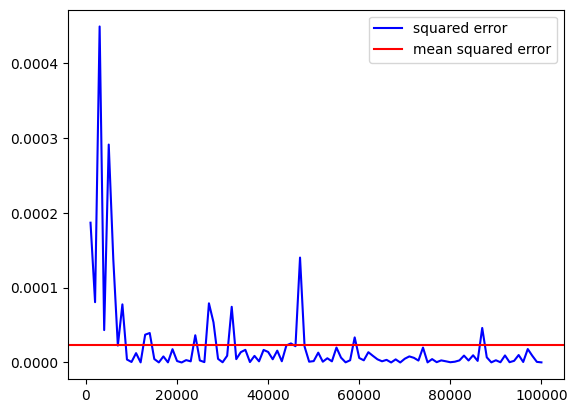

In [22]:
np.random.seed(9991803)
error(Lambda,T,X)

Let epsilon = 1e-4 - accuracy (error) of the calculus

MSE of T(X) ~= $4*10^{-5}$ < epsilon 

=>

With the accuracy of 1e-4:

$\lim\limits_{n->+\infty}{sup|T(X)-\lambda|} = 0$

=>

T(X) is a consistent estimator for $\lambda$, and:

$\lim\limits_{n->+\infty}{g_{\lambda}(T(X))h(X)} = f_{\lambda}(x)$

In [110]:
#visualize the factorization theorem
def visualize_FT(f,g,h):
    fig,ax=plt.subplots(2,3,figsize=(10,6))
    N = [10,50,200,500,1000,10000]
    global X,T
    for i in range(len(N)):
        _1=i//3
        _2=i%3
        #Sample Size
        n=N[i]
        #Sample X
        x=X(n)
        #Statistics value of the sample X
        t=T(x)
        v=np.linspace(0,10,10)
        ax[_1][_2].plot(v,[g(t)*h(x,_v) for _v in v],label="g(t)*h(x)",alpha=0.75,color="r")
        ax[_1][_2].plot(v,[f(_v) for _v in v],label="f(x)",alpha=0.75,color="g")
        ax[_1][_2].set_title("n=%d"%n)
        ax[_1][_2].get_xaxis().set_visible(False)
        ax[_1][_2].legend()

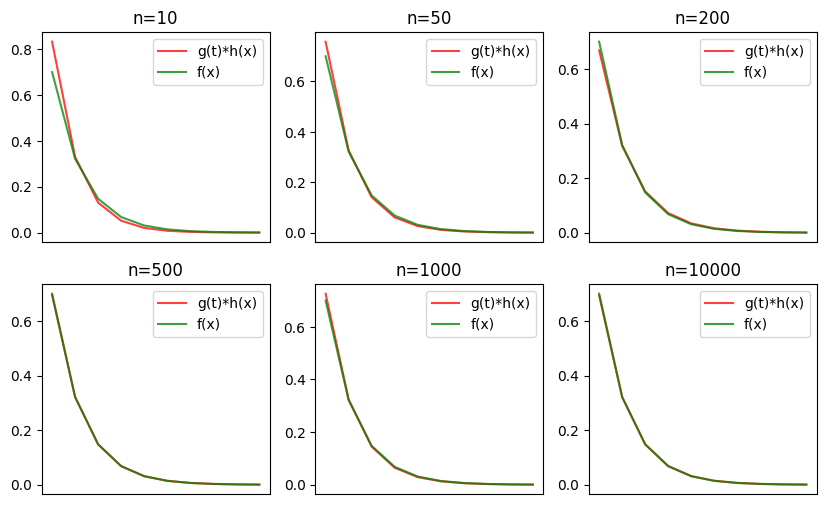

In [111]:
visualize_FT(f,g,h)

#### 4. Conclusions
1. A sufficient statistics 𝑇 for the parameter 𝜆 is found:
    - $T(x_1,x_2,.. x_n) = n*(\sum\limits_{i=1}^{n}{x_i})^{-1}$
    - $\text{T(X) - is an efficient, consistent, asymptotically normal estimator, and does not depend on the value of parameter }\lambda$
2. Using the MSE it was shown that statistics T is consistent for the parameter $\lambda$ (with accuracy = $10^{-4}$)
3. Using the Factorization criteria, it was proved that T is a sufficient statistics:
    - $g_{\lambda}(T(X)) = T(X)$
    - $h(X) = h(x_1 ... x_n,x) = e^{-xn(\sum\limits_{i=1}^{n}{x_i})^{-1}}$
    - $f_{\lambda}(X) = g(T(X))h(X)$
4. The Factorization theorem visualization result (analyzed visually): $g_{\lambda}(T(X))h(X) = f_{\lambda}(x)$, which confirms the correctness of Factorization theorem and chosen functions h(X) and g(X)
